# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification.
We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits).
The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist)
and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Hoeth

Student name: Max
    
ID: 2055977

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from pprintpp import pprint as pp
import pandas as pd

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
import os
import gzip


# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels


In [3]:
import time


#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2055977
np.random.seed(ID)

In [4]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [62 60 61 79 58 62 47 53 56 62]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


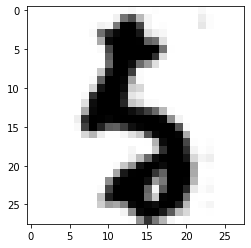

LABEL: 4
INPUT:


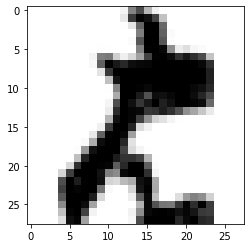

LABEL: 5
INPUT:


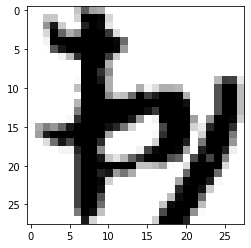

LABEL: 0
INPUT:


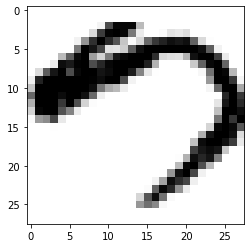

LABEL: 3


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use an SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation.
Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV


m = SVC()
parameters = {'kernel':('linear')}
svm = GridSearchCV(m, {'kernel':['linear']}, cv = 4, n_jobs=-1).fit(X_train, y_train)

print ('RESULTS FOR LINEAR KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp(svm.cv_results_)

RESULTS FOR LINEAR KERNEL
7 7
7 4
7 8
9 9
1 1
9 9
4 4
6 2
5 5
0 0
4 4
2 2
1 6
9 9
4 4
8 8
9 9
9 9
1 1
9 9
Best parameters set found:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.76375
All scores on the grid:
{
    'mean_fit_time': array([0.0488354]),
    'mean_score_time': array([0.01102799]),
    'mean_test_score': array([0.78166667]),
    'param_kernel': masked_array(data=['linear'],
                 mask=[False],
           fill_value='?',
                dtype=object),
    'params': [{'kernel': 'linear'}],
    'rank_test_score': array([1], dtype=int32),
    'split0_test_score': array([0.76666667]),
    'split1_test_score': array([0.81333333]),
    'split2_test_score': array([0.76]),
    'split3_test_score':

## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
m = SVC(kernel='linear', degree=2)
svm = GridSearchCV(m, parameters ,n_jobs=-1, cv=4).fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp((svm.cv_results_))

RESULTS FOR POLY DEGREE=2 KERNEL
7 7
7 4
7 8
9 9
1 1
9 9
4 4
6 2
5 5
0 0
4 4
2 2
1 6
9 9
4 4
8 8
9 9
9 9
1 1
9 9
Best parameters set found:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 2, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.763
All scores on the grid:
{
    'mean_fit_time': array([0.06003577, 0.05084693, 0.0539313 , 0.05825192, 0.06405109,
           0.05996954, 0.07072675, 0.05998474, 0.05592507]),
    'mean_score_time': array([0.01407999, 0.01076233, 0.01202375, 0.0120765 , 0.01346767,
           0.01455241, 0.01717108, 0.0156523 , 0.01236242]),
    'mean_test_score': array([0.76333333, 0.76333333, 0.76333333, 0.78166667, 0.78166667,
           0.78166667, 0.78166667, 0.78166667, 0.78166667]),
    'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 

## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel
m = SVC(kernel='linear', degree=3)
svm = GridSearchCV(m, parameters ,n_jobs=-1, cv=4).fit(X_train, y_train)

print ('RESULTS FOR POLY DEGREE=3 KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp((svm.cv_results_))

RESULTS FOR POLY DEGREE=3 KERNEL
7 7
7 4
7 8
9 9
1 1
9 9
4 4
6 2
5 5
0 0
4 4
2 2
1 6
9 9
4 4
8 8
9 9
9 9
1 1
9 9
Best parameters set found:
{'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.763
All scores on the grid:
{
    'mean_fit_time': array([0.08271372, 0.08048338, 0.06554914, 0.06536508, 0.07001418,
           0.06538552, 0.06609893, 0.06254679, 0.0484817 ]),
    'mean_score_time': array([0.0199787 , 0.01622623, 0.01824981, 0.01571149, 0.01198536,
           0.01625621, 0.01517695, 0.01388973, 0.00991601]),
    'mean_test_score': array([0.76333333, 0.76333333, 0.76333333, 0.78166667, 0.78166667,
           0.78166667, 0.78166667, 0.78166667, 0.78166667]),
    'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

#run SVM with poly of degree 2 kernel
m = SVC(kernel='rbf')
svm = GridSearchCV(m, parameters ,n_jobs=-1, cv=4).fit(X_train, y_train)

print ('RESULTS FOR RFB KERNEL')

for x,y in zip(y_test[:20], svm.predict(X_test)[:20]):
    print(x, y)

print("Best parameters set found:")
print(svm.best_estimator_.get_params())

print("Score with best parameters on Test set:")
print(svm.best_estimator_.score(X_test, y_test))

print("All scores on the grid:")
pp((svm.cv_results_))

RESULTS FOR RFB KERNEL
7 7
7 4
7 8
9 9
1 1
9 9
4 4
6 2
5 5
0 0
4 4
2 2
1 6
9 9
4 4
8 8
9 9
9 9
1 1
9 9
Best parameters set found:
{'C': 10, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Score with best parameters on Test set:
0.8385
All scores on the grid:
{
    'mean_fit_time': array([0.12777251, 0.1224885 , 0.11843532, 0.1170851 , 0.09699571,
           0.10804397, 0.11617279, 0.11055887, 0.07438391, 0.10982025,
           0.11640191, 0.11714333, 0.07986277, 0.11364079, 0.09769475,
           0.11017966]),
    'mean_score_time': array([0.03717613, 0.03594309, 0.03646582, 0.0399186 , 0.04233974,
           0.03487933, 0.03411567, 0.03786284, 0.02816349, 0.03497416,
           0.03572011, 0.03627199, 0.03450817, 0.02878922, 0.02791905,
           0.02645355]),
    'mean

## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

The linear kernel and the poly kernel's are having almost the same score. Only the RFB kernel is way better but in timing there is no big difference between all of them.

## TO DO 5
Report here the best SVM kernel and parameters

In [15]:
#get training and test error for the best SVM model from CV
best_params = {'C':[10], 'gamma':[0.01]}

best_ = SVC(kernel='rbf')
best_SVM = GridSearchCV(best_, best_params ,n_jobs=-1, cv=4).fit(X_train, y_train)

# (error is 1 - svm.score)

training_error = 1 - best_SVM.best_estimator_.score(X_train, y_train)
test_error = 1- best_SVM.best_estimator_.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.161500


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel)
impact the performances of the classifier

In [16]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


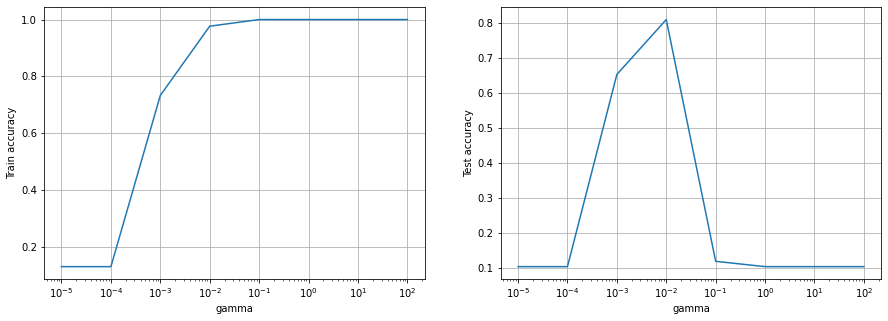

In [17]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

for i in gamma_values:
    parameters = {'C':[1], 'gamma':[i]}
    m = SVC(kernel='rbf')
    svm = GridSearchCV(m, parameters, n_jobs=-1, cv=4).fit(X_train, y_train)

    train_acc_list.append(svm.best_estimator_.score(X_train, y_train))
    test_acc_list.append(svm.best_estimator_.score(X_test, y_test))


# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS

# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

The error of the training set is getting better with higher gamma but not the accuracy of the test set. Thats the problem of overfitting, with too high gamma we are overfitting the model. The error for the training set is the best for a specific value of gamma and we need this value for perfect balance between over- and underfitting

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [18]:
X, y = load_mnist('data', kind='train')
X, y = X / 255., y

permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]


labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [195 194 204 204 186 204 175 205 225 208]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long
time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do
this, report it in the cell below.

In [19]:
#get training and test error for the best SVM model from CV

parameters = {'C':[10], 'gamma':[0.01]}
m = SVC(kernel='rbf')
svm = GridSearchCV(m, parameters, n_jobs=-1, cv=4).fit(X_train, y_train)

training_error = 1 - svm.best_estimator_.score(X_train, y_train)
test_error = 1- svm.best_estimator_.score(X_test, y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

# for 20000, Best SVM training error: 0.000050, Best SVM test error: 0.046850

Best SVM training error: 0.000000
Best SVM test error: 0.117086


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large, large C)¶

In [20]:
from sklearn import linear_model

logreg = linear_model.LogisticRegression(C=10**64).fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1- logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.282690


## TO DO 9 Try  with regularization (use C=1)¶

In [21]:
logreg = linear_model.LogisticRegressionCV(Cs=1, n_jobs=-1).fit(X_train, y_train)

training_error = 1 - logreg.score(X_train, y_train)
test_error = 1- logreg.score(X_test, y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.415000
Best logistic regression test error: 0.452810


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM,
include such aspect in your comparison.
- the results of SVM and of Logistic Regression

The score is getting better with more data as expected but the time we need to compute also rises extremly. I did it for m = 20000 once and got of 4,7%. So we need to find a balance between running time and accuracy. The logisitc regression was very fast but als not very accurat, i got an error 30% without regularization and between 90% and 40% with regularization. So the error with regularization is very random.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [22]:
LR_prediction = linear_model.LogisticRegression(C=10**64).fit(X_train, y_train)
lr_xy = LR_prediction.predict(X_test)

In [23]:
m = SVC(kernel='rbf')
SVM_prediction = GridSearchCV(m, parameters, n_jobs=-1, cv=4).fit(X_train, y_train)
svm_xy = SVM_prediction.predict(X_test)

In [80]:
miss = np.array([])
list_ind = np.array([])
index = 0
for lr,svm,y in zip(lr_xy, svm_xy, y_test):
    index += 1
    if y != lr & y == svm:
        miss = np.append(miss, int(y))
        list_ind = np.append(list_ind, index)
        

SyntaxError: invalid syntax (1401886256.py, line 3)

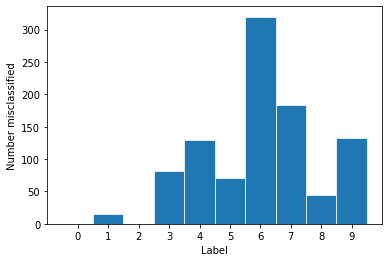

In [71]:
miss = pd.DataFrame(miss).astype(int)
val = miss.value_counts().sort_index()
labels = [i[0] for i in val.index] + [0]
y = np.append(val.values, 0)

plt.xlabel('Label')
plt.ylabel('Number misclassified')
plt.bar(labels, y, width=1, edgecolor="white", linewidth=0.7)
plt.xticks(np.arange(10))
plt.show()

INPUT:


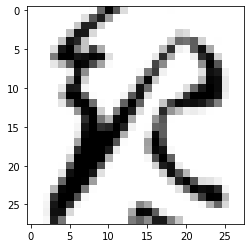

LABEL: 1


In [88]:
plot_input(X_test, y_test, int(list_ind[0]))


## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output
label. Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on
each single class.


In [89]:
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = sklearn.metrics.confusion_matrix(y_test, svm_xy)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM/counts[:,None])

confusion_LR =  sklearn.metrics.confusion_matrix(y_test, lr_xy)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR/counts[:,None] )

Labels and frequencies in test set:  [5825 5813 5809 5795 5796 5790 5810 5779 5791 5792]

 Confusion matrix SVM  
 
 [[5405    2    6   26  117   50    7  104   45   63]
 [  28 4923  148   80  133   38   97    6  152  208]
 [   0   95 4683  187   71   38  408   31  215   81]
 [  11   67   75 5346   57   59   25   49   93   13]
 [ 156   98  138   43 5063   30   61   29   87   91]
 [  37   40   87  190   41 5235   27   26   91   16]
 [  12  154  381   52  220   34 4797   68   79   13]
 [  48   12   61   35  117    8   59 5330   77   32]
 [  47   99   74   78   35   40  106   11 5282   19]
 [  31  117  157   31  130   20   21   19   70 5196]]

 Confusion matrix SVM (normalized)   
 
 [[0.93 0.   0.   0.   0.02 0.01 0.   0.02 0.01 0.01]
 [0.   0.85 0.03 0.01 0.02 0.01 0.02 0.   0.03 0.04]
 [0.   0.02 0.81 0.03 0.01 0.01 0.07 0.01 0.04 0.01]
 [0.   0.01 0.01 0.92 0.01 0.01 0.   0.01 0.02 0.  ]
 [0.03 0.02 0.02 0.01 0.87 0.01 0.01 0.01 0.02 0.02]
 [0.01 0.01 0.02 0.03 0.01 0.9  0.   0.   0.0

In [90]:
confusion_SVM = confusion_SVM/confusion_SVM.max() # ...confusion_matrix(y_test, svm_xy, normalize='true')
confusion_LR = confusion_LR/confusion_LR.max()
print('Normalized Confusion Matrix SVM \n' )
print(confusion_SVM,'\n')
print('Normalized Confusion Matrix LR \n' )
print(confusion_LR)

Normalized Confusion Matrix SVM 

[[1.   0.   0.   0.   0.02 0.01 0.   0.02 0.01 0.01]
 [0.01 0.91 0.03 0.01 0.02 0.01 0.02 0.   0.03 0.04]
 [0.   0.02 0.87 0.03 0.01 0.01 0.08 0.01 0.04 0.01]
 [0.   0.01 0.01 0.99 0.01 0.01 0.   0.01 0.02 0.  ]
 [0.03 0.02 0.03 0.01 0.94 0.01 0.01 0.01 0.02 0.02]
 [0.01 0.01 0.02 0.04 0.01 0.97 0.   0.   0.02 0.  ]
 [0.   0.03 0.07 0.01 0.04 0.01 0.89 0.01 0.01 0.  ]
 [0.01 0.   0.01 0.01 0.02 0.   0.01 0.99 0.01 0.01]
 [0.01 0.02 0.01 0.01 0.01 0.01 0.02 0.   0.98 0.  ]
 [0.01 0.02 0.03 0.01 0.02 0.   0.   0.   0.01 0.96]] 

Normalized Confusion Matrix LR 

[[1.   0.   0.01 0.01 0.07 0.03 0.02 0.04 0.02 0.05]
 [0.   0.81 0.11 0.03 0.07 0.02 0.04 0.01 0.06 0.08]
 [0.   0.06 0.69 0.05 0.06 0.06 0.15 0.03 0.12 0.04]
 [0.01 0.03 0.03 0.96 0.04 0.07 0.02 0.04 0.03 0.01]
 [0.04 0.06 0.05 0.02 0.91 0.02 0.04 0.02 0.02 0.05]
 [0.04 0.02 0.03 0.09 0.02 0.94 0.02 0.03 0.04 0.02]
 [0.01 0.06 0.11 0.03 0.04 0.03 0.88 0.02 0.06 0.02]
 [0.02 0.01 0.02 0.03 0.05 0.

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and
others a higher one ? Make some guesses on the possible causes.

The accuracy on the different labels could depend on similarity to other labels. If a label is very unique from the pattern, shapes, brightness, etc. it is maybe more easy to calculate the difference between this and other labels. On the other hand it is probably very hard to tell the difference between two labels which are looking very similiar. Even for the human brain it is hard sometimes to tell read handwriting from other people. It is probably the same for a Model.